# Data Preparation

My initial task is to prepare and get myself familiar with the dataset [Suomi24-toxicity-annotated](https://huggingface.co/datasets/TurkuNLP/Suomi24-toxicity-annotated).

In [1]:
from datasets import load_dataset

dataset = load_dataset(
    "TurkuNLP/Suomi24-toxicity-annotated",
    split="test",
)

/home/roni/dev/thesis/qlora-gpt-fine-tuning/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Now that dataset is downloaded, it's a good idea to see in what proportion data is.

/home/roni/dev/thesis/qlora-gpt-fine-tuning/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/roni/dev/thesis/qlora-gpt-fine-tuning/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/roni/dev/thesis/qlora-gpt-fine-tuning/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/home/roni/dev/thesis/qlora-gpt-fine-tuning/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dty

<Axes: xlabel='count'>

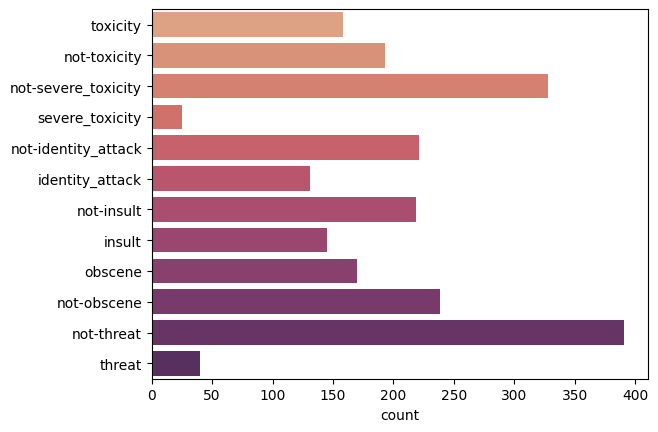

In [2]:
import seaborn as sns

sns.countplot(y=dataset["label"], palette="flare")

I'm doing the data exploratory stages using bert model, because I'm not quite sure at this point how to get word embeddings of `Bloom` model.

In [3]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("TurkuNLP/bert-large-finnish-cased-toxicity")
tokenizer = AutoTokenizer.from_pretrained("TurkuNLP/bert-large-finnish-cased-v1")

In [4]:
labels = dataset['label']
texts = dataset['text']

In [10]:
from tqdm import tqdm

wordVecs = []

for text in tqdm(texts):
    input = tokenizer(text, return_tensors='pt')
    output = model(**input)

    wordVecs.append(output.logits[0])

100%|██████████| 19/19 [00:43<00:00,  2.28s/it]


In [ ]:
import umap

import matplotlib.pyplot as plt

mapped_embedding = umap.UMAP(random_state=42).fit_transform(wordVec)
plt.scatter(mapped_embedding[:, 0], mapped_embedding[:, 1], s=0.1, cmap="Spectral")